# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv("Data/AirQualityUCI.csv", sep=";", 
                parse_dates = True,
                infer_datetime_format = True)
df.dropna(axis=1, inplace=True)
df.drop(['NMHC(GT)', 'C6H6(GT)','PT08.S1(CO)',
       'PT08.S2(NMHC)', 'NO2(GT)', 'PT08.S3(NOx)',
       'PT08.S5(O3)', 'RH', 'AH'], axis=1, inplace=True)
df.columns = ["Date", "Time", "CO", "NOx", "NO2", "temp" ]
df["datetime"] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format = "%d/%m/%Y %H.%M.%S")
df.drop(["Date", "Time"], axis=1, inplace=True)
df.set_index("datetime", drop=True, inplace=True)
df["CO"] = df["CO"].str.replace(",", ".").astype(float)
df["temp"] = df["temp"].str.replace(",", ".").astype(float)
df = df[df["temp"] > -100].copy()
temp = df[["temp"]].copy()
df.head()

,CO,NOx,NO2,temp
datetime,,,,
2004-03-10 18:00:00,2.6,166,1692,13.6
2004-03-10 19:00:00,2.0,103,1559,13.3
2004-03-10 20:00:00,2.2,131,1555,11.9
2004-03-10 21:00:00,2.2,172,1584,11.0
2004-03-10 22:00:00,1.6,131,1490,11.2


# Time series manipulation

## Normalization

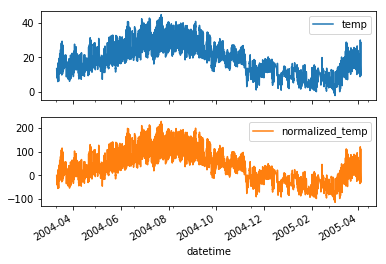

In [15]:
temp["normalized_temp"] = temp.div(temp.iloc[0]).sub(1).mul(100)
temp.plot(subplots=True);

## Resampling

In [37]:
dates = pd.date_range(start = '2004', periods = 10, freq = "Q")
data = 2 + np.random.randn(10) * 3
quarterly = pd.Series(data=data, index=dates)
quarterly

2004-03-31    4.478809
2004-06-30    4.373261
2004-09-30    2.004478
2004-12-31    2.800499
2005-03-31    2.568376
2005-06-30   -1.818856
2005-09-30    5.111351
2005-12-31    1.465302
2006-03-31    3.196457
2006-06-30    2.707120
Freq: Q-DEC, dtype: float64

In [48]:
quarterly.resample("MS").ffill()

2004-03-01         NaN
2004-04-01    4.478809
2004-05-01    4.478809
2004-06-01    4.478809
2004-07-01    4.373261
2004-08-01    4.373261
2004-09-01    4.373261
2004-10-01    2.004478
2004-11-01    2.004478
2004-12-01    2.004478
2005-01-01    2.800499
2005-02-01    2.800499
2005-03-01    2.800499
2005-04-01    2.568376
2005-05-01    2.568376
2005-06-01    2.568376
2005-07-01   -1.818856
2005-08-01   -1.818856
2005-09-01   -1.818856
2005-10-01    5.111351
2005-11-01    5.111351
2005-12-01    5.111351
2006-01-01    1.465302
2006-02-01    1.465302
2006-03-01    1.465302
2006-04-01    3.196457
2006-05-01    3.196457
2006-06-01    3.196457
Freq: MS, dtype: float64

In [54]:
quarterly.resample("M").interpolate()

2004-03-31    4.478809
2004-04-30    4.443626
2004-05-31    4.408443
2004-06-30    4.373261
2004-07-31    3.583667
2004-08-31    2.794072
2004-09-30    2.004478
2004-10-31    2.269819
2004-11-30    2.535159
2004-12-31    2.800499
2005-01-31    2.723125
2005-02-28    2.645751
2005-03-31    2.568376
2005-04-30    1.105965
2005-05-31   -0.356445
2005-06-30   -1.818856
2005-07-31    0.491213
2005-08-31    2.801282
2005-09-30    5.111351
2005-10-31    3.896001
2005-11-30    2.680652
2005-12-31    1.465302
2006-01-31    2.042354
2006-02-28    2.619405
2006-03-31    3.196457
2006-04-30    3.033345
2006-05-31    2.870233
2006-06-30    2.707120
Freq: M, dtype: float64

In [40]:
monthly = quarterly.asfreq("M").to_frame("baseline")
monthly["ffill"] = quarterly.asfreq("M", method="ffill")
monthly["bfill"] = quarterly.asfreq("M", method="bfill")
monthly

,baseline,ffill,bfill
2004-03-31,4.478809,4.478809,4.478809
2004-04-30,NaN,4.478809,4.373261
2004-05-31,NaN,4.478809,4.373261
2004-06-30,4.373261,4.373261,4.373261
2004-07-31,NaN,4.373261,2.004478
2004-08-31,NaN,4.373261,2.004478
2004-09-30,2.004478,2.004478,2.004478
2004-10-31,NaN,2.004478,2.800499
2004-11-30,NaN,2.004478,2.800499
2004-12-31,2.800499,2.800499,2.800499


In [55]:
a = temp.temp
a.resample("BMS").agg(["mean", "std", "median"]) # BMS = business month start

,mean,std,median
datetime,,,
2004-03-01,14.390784,4.447539,14.05
2004-04-01,16.999595,4.799807,16.30
2004-05-03,20.310117,5.298621,19.20
2004-06-01,26.476540,5.958139,25.20
2004-07-01,29.457757,6.168751,28.10
2004-08-02,29.075857,5.161165,28.00
2004-09-01,24.620370,5.469492,23.70
2004-10-01,20.497577,3.589077,20.30
2004-11-01,13.485417,4.990447,13.25


## Decomposition

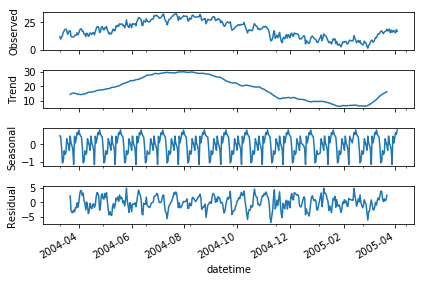

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(temp.resample("D").mean().dropna(), freq = 24)

decomp.plot();

# Window computations

## Rolling windows

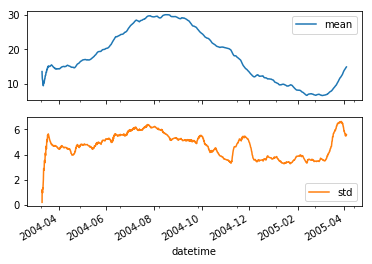

In [66]:
df.temp.rolling("30D").agg(["mean", "std"]).plot(subplots=True);

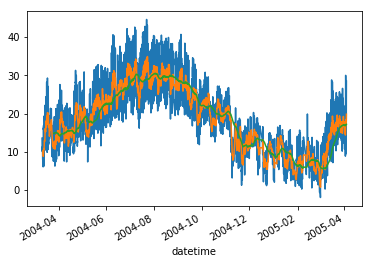

In [61]:
df.temp.plot()
df.temp.rolling(window = 30).mean().plot() # rolling average
df.temp.rolling(window = 360).mean().plot() # rolling average

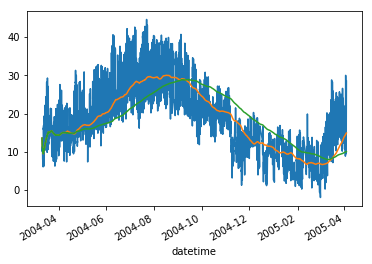

In [62]:
df.temp.plot()
df.temp.rolling(window = "30D").mean().plot() # rolling average
df.temp.rolling(window = "90D").mean().plot() # rolling average

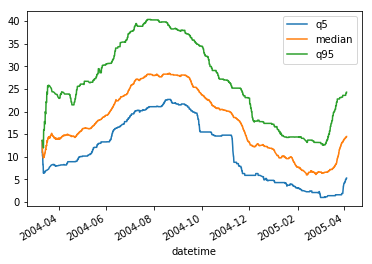

In [67]:
rolling = df.temp.rolling("30D")
q5 = rolling.quantile(0.05).to_frame("q5")
median = rolling.quantile(0.5).to_frame("median")
q95 = rolling.quantile(0.95).to_frame("q95")
pd.concat([q5, median, q95], axis=1).plot()

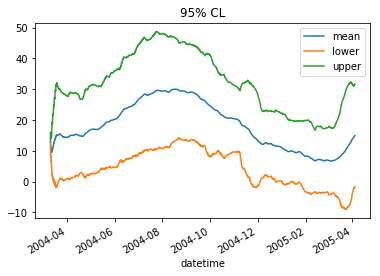

In [73]:
rolling = df.temp.rolling("30D")
std = rolling.std().to_frame("std")
mean = rolling.mean().to_frame("mean")
res = pd.concat([mean, std], axis=1)
res["lower"] = res["mean"] - 3 * res["std"]
res["upper"] = res["mean"] + 3 * res["std"]
res.drop("std", axis=1).plot(title="95% CL")

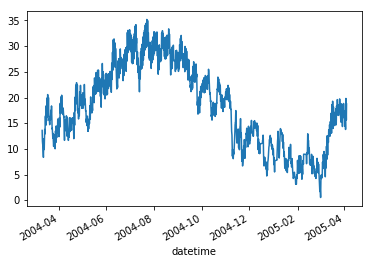

In [16]:
# Exponentially weighted average
df.temp.ewm(span = 30).mean().plot()

## Expanding windows

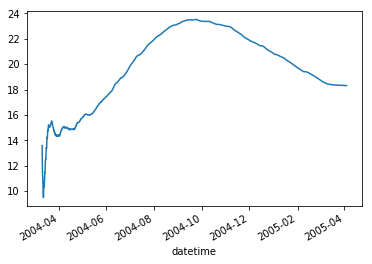

In [76]:
df.temp.expanding().mean().plot()

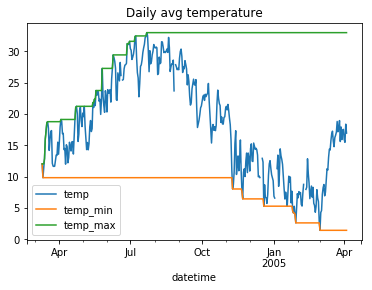

In [82]:
df2 = df.resample("D").mean().copy()
df2["temp_min"] = df2.temp.expanding().min()
df2["temp_max"] = df2.temp.expanding().max()

df2[["temp", "temp_min", "temp_max"]].plot(title="Daily avg temperature")

# Correlation

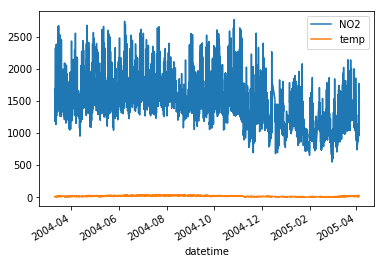

In [87]:
df[["NO2", "temp"]].plot()

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


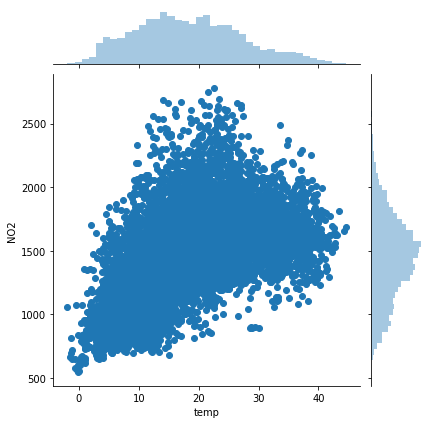

In [89]:
sns.jointplot(x="temp", y = "NO2", data=df)

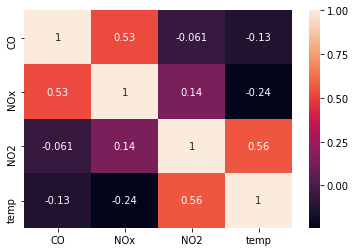

In [92]:
sns.heatmap(df.corr(), annot=True)

# Visualization

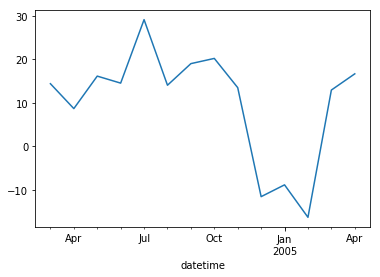

In [80]:
df.temp.resample("m").mean().plot()

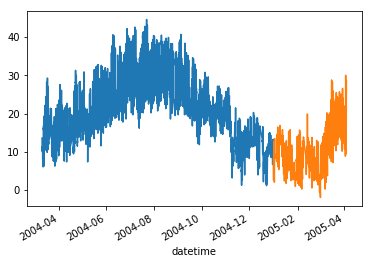

In [10]:
fig, ax = plt.subplots()
df.loc[:"2004", "temp"].plot(ax=ax)
df.loc['2005':, "temp"].plot(ax=ax)

['seaborn-muted', 'seaborn-darkgrid', 'fast', 'seaborn', 'seaborn-talk', 'seaborn-deep', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn-whitegrid', 'classic', 'seaborn-paper', 'bmh', 'dark_background', 'seaborn-colorblind', 'seaborn-poster', 'grayscale', '_classic_test', 'ggplot', 'seaborn-pastel', 'Solarize_Light2', 'seaborn-bright', 'tableau-colorblind10', 'seaborn-ticks', 'seaborn-white', 'seaborn-notebook', 'seaborn-dark']


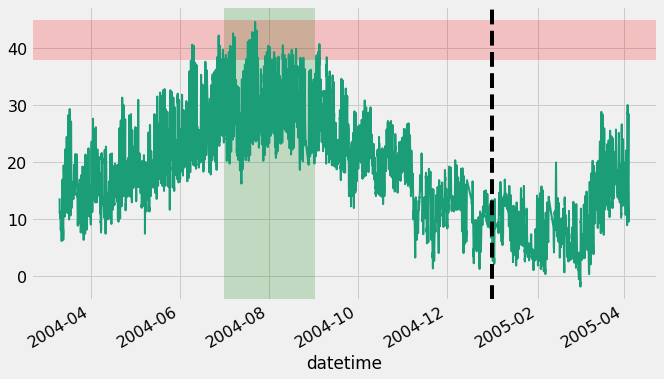

In [37]:
plt.style.use("fivethirtyeight")
print(plt.style.available)
ax = df.temp.plot(figsize=(10,6),
            fontsize = 16,
            linewidth = 2,
            linestyle = "-")

ax.axvspan('2004-07-01', '2004-09-01', color="green", alpha=0.2)
ax.axhspan(38,45, color="red", alpha=0.2)

ax.axvline('2005-01-01', color="black", linestyle="--")

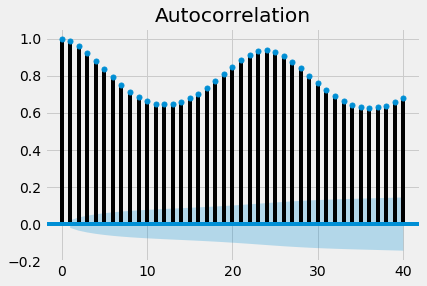

In [27]:
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

fig = tsaplots.plot_acf(df.temp, lags=40)

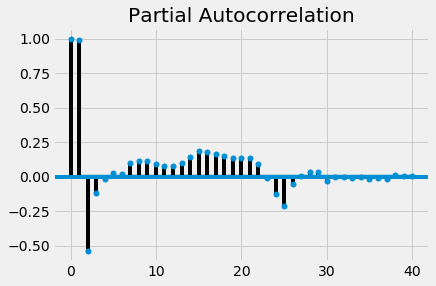

In [28]:
fig = tsaplots.plot_pacf(df.temp, lags=40)

In [36]:
decomposition = sm.tsa.seasonal_decompose(df["temp"])
decomposition.plot()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

# Stationarity

In [13]:
from statsmodels.tsa.stattools import adfuller

# augmented Dicky Fuller test
# H0: TS is not stationary
results = adfuller(df["temp"])

print("Test statistics: {}".format(results[0]))
print("p-value: {}".format(results[1]))

Test statistics: -2.8517742429719037
p-value: 0.051250279931457754


(-22.584622146090318, 0.0, 28, 8961, {'10%': -2.5669417122496907, '1%': -3.4310799602965787, '5%': -2.861862594910227}, 25776.24900115557)
(-18.01971077199697, 2.6977543220693488e-30, 37, 8951, {'10%': -2.5669419041246435, '1%': -3.431080776037606, '5%': -2.8618629553702966}, 25982.620720322328)
(-32.295838775091916, 0.0, 37, 8951, {'10%': -2.5669419041246435, '1%': -3.431080776037606, '5%': -2.8618629553702966}, 26093.85122792998)


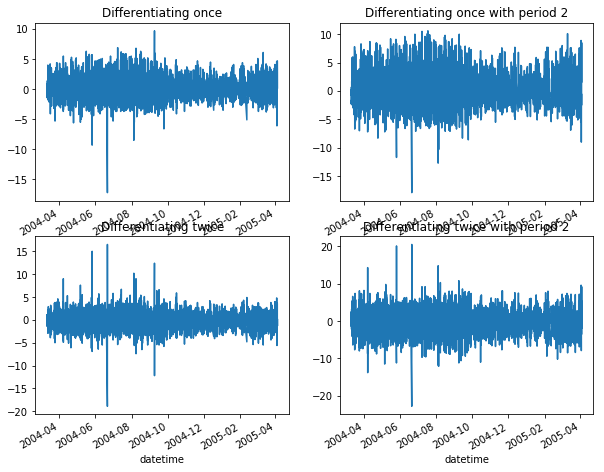

In [26]:
temperature = df.temp.copy()
fig, ax = plt.subplots(2,2, figsize=(10,8))

temperature.diff().plot(ax=ax[0,0]) # differentiating makes the ts stationary
ax[0,0].set_title("Differentiating once")
temperature.diff(2).plot(ax=ax[0,1])
ax[0,1].set_title("Differentiating once with period 2")

temperature.diff().diff().plot(ax=ax[1,0]) # differentiating makes the ts stationary
ax[1,0].set_title("Differentiating twice")
temperature.diff(2).diff(2).plot(ax=ax[1,1])
ax[1,1].set_title("Differentiating twice with period 2")

print(adfuller(temperature.diff().dropna()))
print(adfuller(temperature.diff(2).dropna()))
print(adfuller(temperature.diff().diff().dropna()))

# ARIMA models

## ACF-PACF

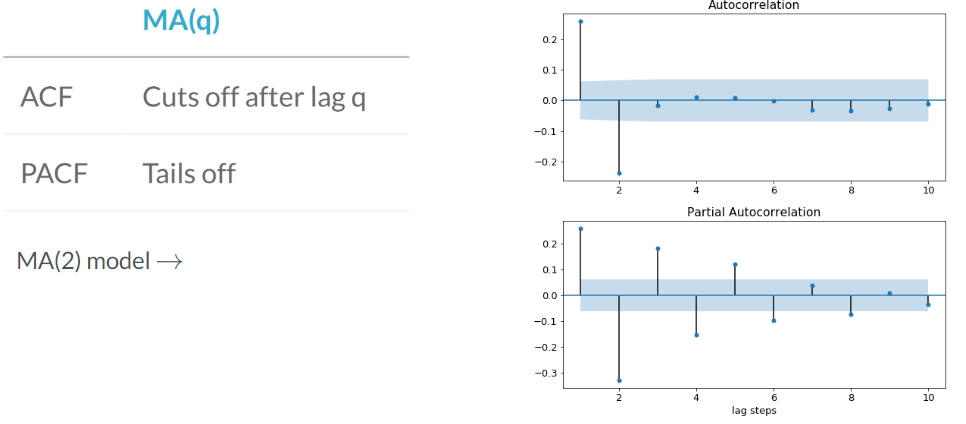
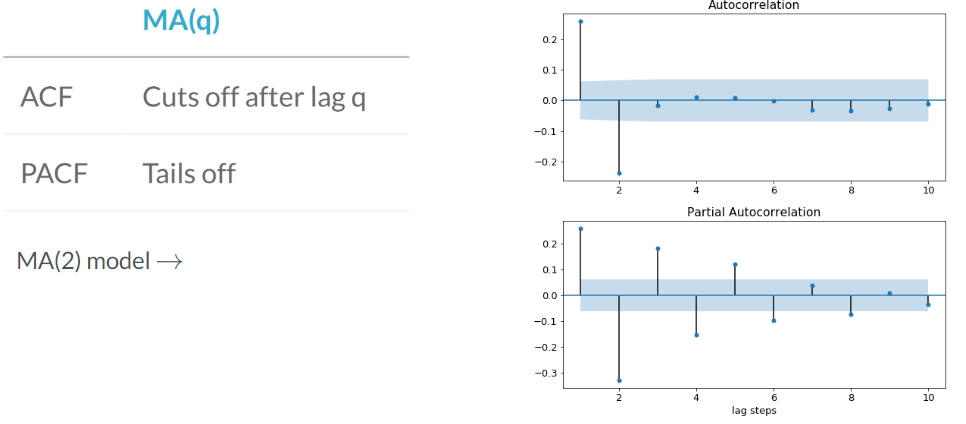

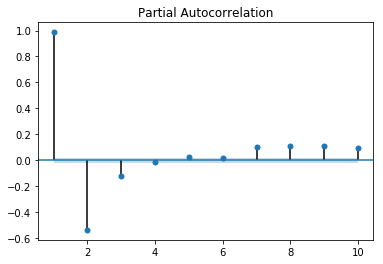

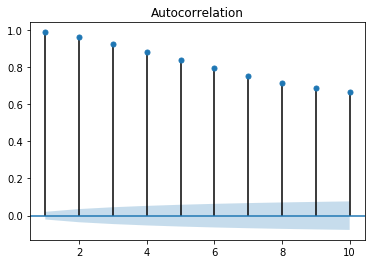

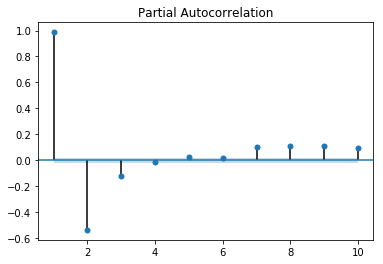

In [81]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,6))

plot_acf(temp, lags = 10, zero = False)
plot_pacf(temp, lags = 10, zero = False)

## AIC - BIC

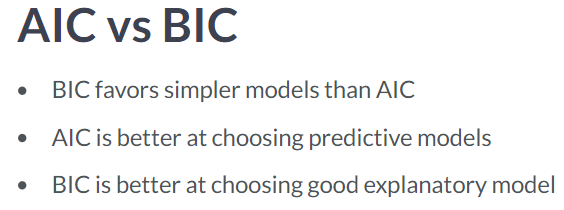

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(temp_daily, order = (1,1,1))

results = model.fit()

print("AIC = {}".format(results.aic))
print("BIC = {}".format(results.bic))

AIC = 1586.865099663728
BIC = 1598.763539881099


In [98]:
def find_best_model_aic(ts):
    """
    Loop over all the p and q parameters to identify the combinations with the lowest AIC
    """
    
    res = []
    
    for p in range(4):
        for q in range(4):
            try: # sometimes it leads to an unstationary model and would stop the loop
                model = SARIMAX(ts, order = (p,0,q))
                results = model.fit()

                res.append((p, q, results.aic, results.bic))
            except:
                res.append((p,q, None, None))
                
    return(pd.DataFrame(res, columns = ["p", "q", "aic", "bic"]).sort_values("aic"))

In [99]:
find_best_model_aic(temp_daily)

,p,q,aic,bic
14,3,2,1594.023456,1617.835701
10,2,2,1594.076403,1613.919941
13,3,1,1594.951858,1614.795396
6,1,2,1598.164755,1614.039586
7,1,3,1598.650485,1618.494023
12,3,0,1602.832451,1618.707281
4,1,0,1612.012273,1619.949688
5,1,1,1613.182657,1625.088779
8,2,0,1613.480351,1625.386474
3,0,3,2339.450847,2355.325678


## ARMA

Text(0.5,1,'AR(1)MA(1) model with coefficient 0.5 and 0.2')

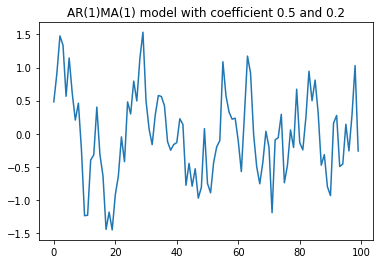

In [4]:
from statsmodels.tsa.arima_process import arma_generate_sample

ar_coefs = [1, -0.5] # !!! we need to pass the negation of the coeff we want !!!
ma_coefs = [1, 0.2]

y = arma_generate_sample(ar_coefs, ma_coefs, nsample = 100, sigma = 0.5)

plt.plot(y)
plt.title("AR(1)MA(1) model with coefficient 0.5 and 0.2")

In [5]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(y, order=(1,1))

results = model.fit()

In [13]:
model = ARMA(temp, order = (2,1))

results = model.fit()

results.summary()

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   temp   No. Observations:                 8991
Model:                     ARMA(2, 1)   Log Likelihood              -14399.688
Method:                       css-mle   S.D. of innovations              1.200
Date:                Tue, 17 Mar 2020   AIC                          28809.376
Time:                        11:01:45   BIC                          28844.896
Sample:                             0   HQIC                         28821.463
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3312      0.542     33.815      0.000      17.269      19.394
ar.L1.temp     1.6656      0.013    125.987      0.000       1.640       1.692
ar.L2.temp    -0.6839      0.013    -52.311      0.000      -0.710      -0.658
ma.L1.temp    -0.2128      0.017    -12.290      0.000      -0.247      -0.179
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0743           +0.0000j            1.0743            0.0000
AR.2            1.3610           +0.0000j            1.3610            0.0000
MA.1            4.6995           +0.0000j            4.6995            0.0000
-----------------------------------------------------------------------------
"""

## ARMAX

When you include additional variables values at time t

In [16]:
model = ARMA(df["temp"], order = (1,1), exog = df['NO2'])

results = model.fit()

results.summary()

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   temp   No. Observations:                 8991
Model:                     ARMA(1, 1)   Log Likelihood              -14913.951
Method:                       css-mle   S.D. of innovations              1.271
Date:                Tue, 17 Mar 2020   AIC                          29837.901
Time:                        11:03:11   BIC                          29873.421
Sample:                             0   HQIC                         29849.988
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.3649      0.947     20.443      0.000      17.508      21.221
NO2           -0.0007   9.38e-05     -7.093      0.000      -0.001      -0.000
ar.L1.temp     0.9799      0.002    464.477      0.000       0.976       0.984
ma.L1.temp     0.4105      0.008     50.236      0.000       0.395       0.427
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0205           +0.0000j            1.0205            0.0000
MA.1           -2.4358           +0.0000j            2.4358            0.5000
-----------------------------------------------------------------------------
"""

## ARIMA

allows to do differenciation on the fly without having to reconstruct the forecast after fitting the model with cumsum

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df["temp"], order = (1,1,1))

results = model.fit()

results.summary()

results.get_forecast(steps = 10).predicted_mean

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


8991    28.744576
8992    28.901766
8993    29.002792
8994    29.067722
8995    29.109453
8996    29.136274
8997    29.153511
8998    29.164590
8999    29.171710
9000    29.176287
dtype: float64

## SARIMA

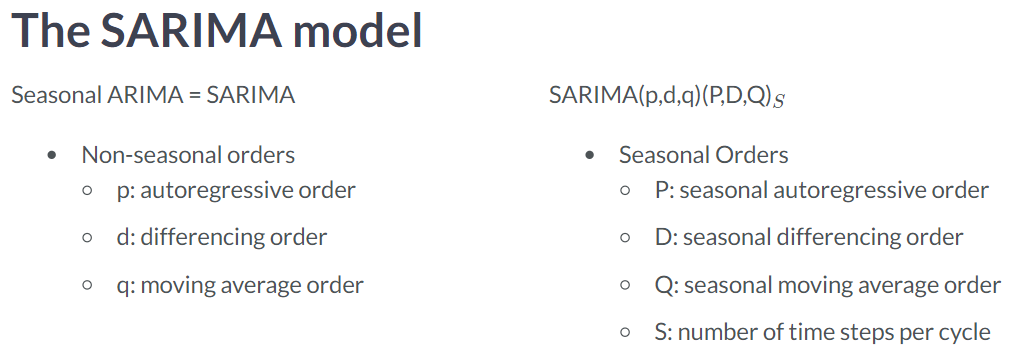

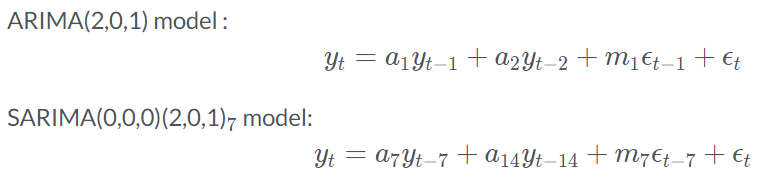

In [120]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df["temp"], order = (1,1,1), seasonal_order=(1,0,1,24))

results = model.fit()

results.summary()

results.get_forecast(steps = 10).predicted_mean

/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


8991    28.882515
8992    28.504799
8993    28.187741
8994    25.709924
8995    23.798306
8996    22.498195
8997    21.808701
8998    21.352379
8999    21.014181
9000    20.830218
dtype: float64

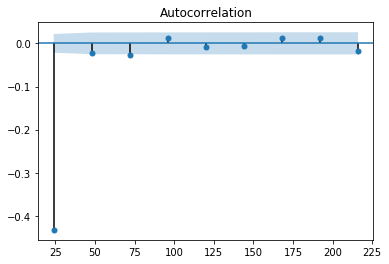

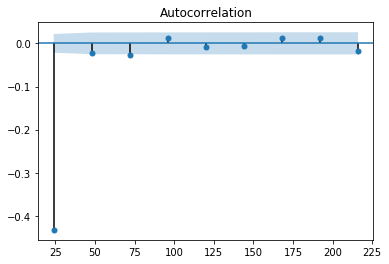

In [128]:
plot_acf(temp.diff().diff(24).dropna(), lags=np.arange(24,240,24), zero=False)

In [ ]:
import pmdarima as pm
# Create auto_arima model
# Create model for SARIMAX(p,1,q)(P,1,Q)7
model3 = pm.auto_arima(df3,
                      seasonal=True, m=7,
                      d=1, D=1, 
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model3.summary())

# Forecasting

## One step ahead prediction

In [36]:
temp = df[["temp"]].copy()
temp_daily = temp.resample("D").mean()

In [55]:
def plot_forecast(ts, forecast):
    
    mean_forecast = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()

    lower_limits = confidence_intervals.loc[:,'lower temp']
    upper_limits = confidence_intervals.loc[:,'upper temp']

    plt.figure(figsize=(12,8))
    plt.plot(ts, label='observed')

    plt.plot(mean_forecast, color='r', label='forecast')

    plt.fill_between(lower_limits.index, lower_limits,
             upper_limits, color='pink')

    plt.xlabel('Date')
    plt.ylabel('Temp')
    plt.legend()
    plt.show()

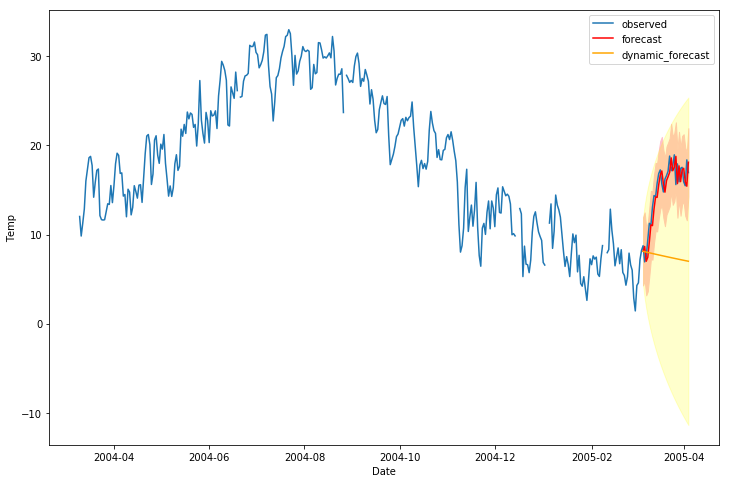

In [100]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(temp_daily, order=(1,0,1))

results = model.fit()

one_step_forecast = results.get_prediction(start=-30)
mean_forecast = one_step_forecast.predicted_mean
confidence_intervals = one_step_forecast.conf_int()

lower_limits = confidence_intervals.loc[:,'lower temp']
upper_limits = confidence_intervals.loc[:,'upper temp']

plt.figure(figsize=(12,8))
plt.plot(temp_daily, label='observed')

plt.plot(mean_forecast, color='r', label='forecast')

plt.fill_between(lower_limits.index, lower_limits,
		 upper_limits, color='pink')


one_step_forecast = results.get_prediction(start=-30, dynamic=True)
mean_forecast = one_step_forecast.predicted_mean
confidence_intervals = one_step_forecast.conf_int()

lower_limits = confidence_intervals.loc[:,'lower temp']
upper_limits = confidence_intervals.loc[:,'upper temp']


plt.plot(mean_forecast, color='orange', label='dynamic_forecast')

plt.fill_between(lower_limits.index, lower_limits,
		 upper_limits, color='yellow', alpha=0.2)

plt.xlabel('Date')
plt.ylabel('Temp')
plt.legend()
plt.show()

In [106]:
print(np.mean(np.absolute(results.resid)))

1.553218589548581


                           Statespace Model Results                           
Dep. Variable:                   temp   No. Observations:                  391
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -803.591
Date:                Thu, 19 Mar 2020   AIC                           1613.183
Time:                        09:21:32   BIC                           1625.089
Sample:                    03-10-2004   HQIC                          1617.902
                         - 04-04-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9949      0.005    204.343      0.000       0.985       1.004
ma.L1         -0.0587      0.050     -1.184      0.236      -0.156       0.038
sigma2         3.8019      0.253     15.034      0.0

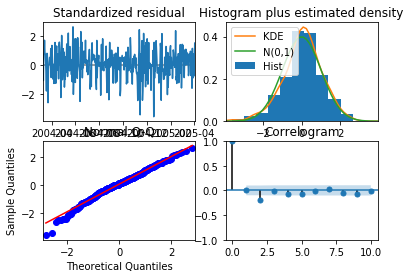

In [105]:
results.plot_diagnostics();
print(results.summary()) # prob(Q) = pvalue for H0= residuals uncorrelated, prob(JB) = pvalue for H0= residuals normally distributed

## out sample

In [60]:
forecast = results.get_forecast(steps = 50).predicted_mean

plot_forecast(temp, forecast)

AttributeError: 'Series' object has no attribute 'predicted_mean'

# Box Jenkins method

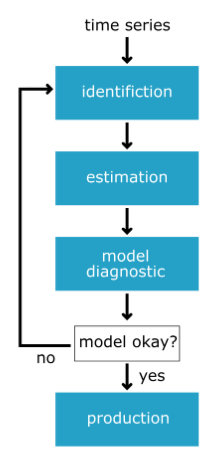

In [133]:
import joblib

joblib.dump(model, "model_output.pkl")

['model_output.pkl']

In [135]:
mod = joblib.load("model_output.pkl")
# mod.update(df_new) # to add more new data to an already trained model

# Machine learning

## Sound data

In [ ]:
import librosa as lr
from glob import glob

# List all the wav files in the folder
audio_files = glob(data_dir + '/*.wav')

# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

## using AR with other features

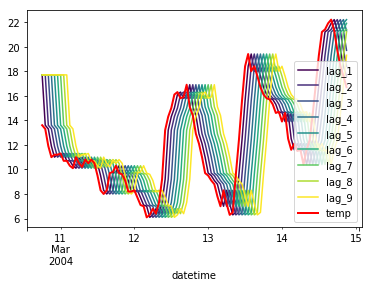

In [134]:
shifts = np.arange(1,10)

AR_features = {"lag_{}".format(i): temp.shift(i).temp for i in shifts}
AR_features = pd.DataFrame(AR_features)
AR_features.fillna(np.nanmedian(AR_features), inplace=True)
AR_features.head()

ax = AR_features.iloc[:100].plot(cmap=plt.cm.viridis)
temp.iloc[:100].plot(color='r', lw=2,ax=ax)
ax.legend(loc='best')
plt.show()

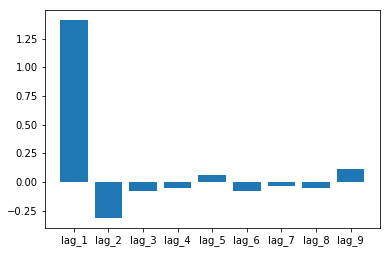

Text(0.5,0,'Date')

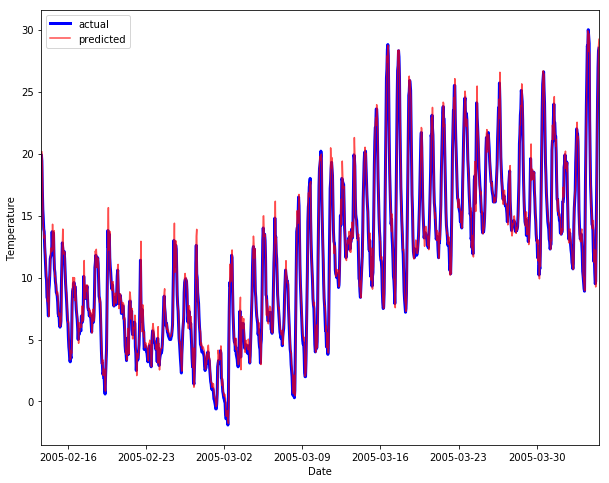

In [146]:
from sklearn.linear_model import Ridge

num_points_test_set = 1200

X_train = AR_features[:-num_points_test_set]
y_train = temp[:-num_points_test_set]
X_test = AR_features[-num_points_test_set:]
y_test = temp[-num_points_test_set:]

model = Ridge()
model.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.bar(AR_features.columns, model.coef_.reshape(-1))
plt.show()

predictions = model.predict(X_test)
preds = pd.Series(predictions.reshape(-1), index=y_test.index)

plt.figure(figsize=(10,8))
# plt.plot(y_train, c="black")
plt.plot(y_test, c="blue", lw=3)
plt.plot(preds, c="r", alpha=0.7)
plt.xlim(np.min(y_test.index), np.max(y_test.index));
plt.legend(["actual", "predicted"])
plt.ylabel("Temperature")
plt.xlabel("Date")

## CV

In [93]:
def plot_cv_segments(cv, X, y):
    fig, ax = plt.subplots(figsize=(8,6))
    for ii, (tr, tt) in enumerate(cv.split(X, y)):
        ax.scatter(tr, ii + 1e-3*y[tr])

    ax.set(title='Training data on each CV iteration', ylabel='CV iteration')
    plt.show()

Bad case

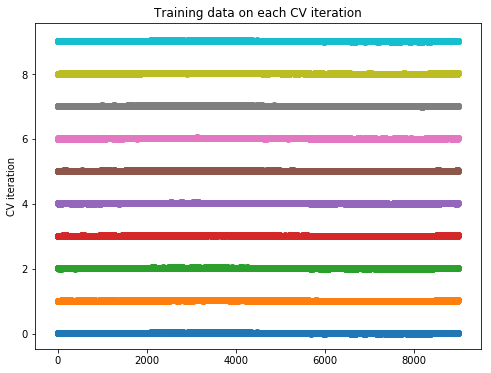

In [95]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10)

plot_cv_segments(cv, X, y)

Problem: in some cases we use the future to predict the past

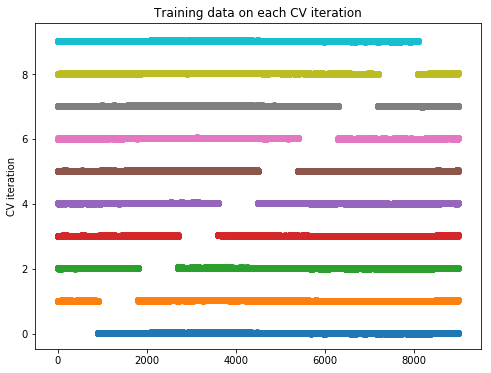

In [94]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle=False)

plot_cv_segments(cv, X, y)

Good way

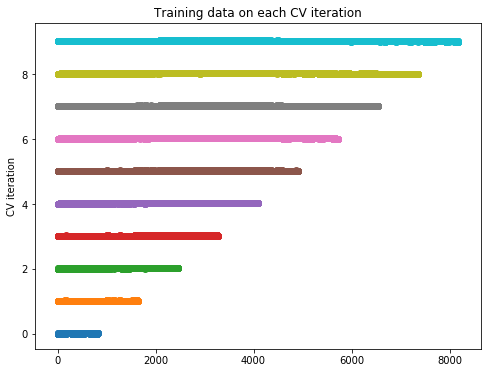

In [96]:
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(n_splits = 10)

plot_cv_segments(cv, X, y)

In [147]:
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.metrics import r2_score

cv = TimeSeriesSplit(n_splits=10)

X = AR_features.values
y = temp.values

# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X[tr], y[tr])
    
    # Generate predictions on the test data, score the predictions, and collect
    prediction = model.predict(X[tt])
    score = r2_score(prediction, y[tt])
    results.append((prediction, score, tt))
    

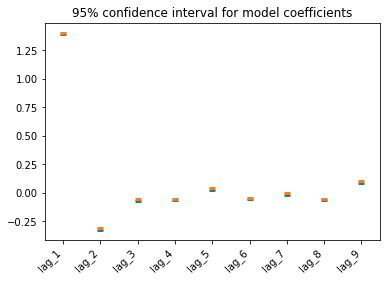

In [150]:
from sklearn.utils import resample

def bootstrap_interval(data, percentiles=(2.5, 97.5), n_boots=100):
    """Bootstrap a confidence interval for the mean of columns of a 2-D dataset."""
    # Create our empty array to fill the results
    bootstrap_means = np.zeros([n_boots, data.shape[-1]])
    for ii in range(n_boots):
        # Generate random indices for our data *with* replacement, then take the sample mean
        random_sample = resample(data)
        bootstrap_means[ii] = random_sample.mean(axis=0)
        
    # Compute the percentiles of choice for the bootstrapped means
    percentiles = np.percentile(bootstrap_means, percentiles, axis=0)
    return percentiles

# Iterate through CV splits
n_splits = 100
cv = TimeSeriesSplit(n_splits=n_splits)

# Create empty array to collect coefficients
coefficients = np.zeros([n_splits, X.shape[1]])

for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Fit the model on training data and collect the coefficients
    model.fit(X[tr], y[tr])
    coefficients[ii] = model.coef_

# Calculate a confidence interval around each coefficient
bootstrapped_interval = bootstrap_interval(coefficients)

# Plot it
fig, ax = plt.subplots()
ax.scatter(AR_features.columns, bootstrapped_interval[0], marker='_', lw=3)
ax.scatter(AR_features.columns, bootstrapped_interval[1], marker='_', lw=3)
ax.set(title='95% confidence interval for model coefficients')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()